# Step 0: Importing usual libraries : #

In [ ]:
#Import all necessary libraries/modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests

%matplotlib inline

# Step 1: Get the data : #

In [ ]:
#Downloading the data

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())


iris = load_iris()
#print(iris)

print()

y = iris.target     #target variables
print(y)
print(iris.target_names)

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
#Number of rows and columns ie labels
print(df.shape)
print(y.shape)
print()
df["species"].value_counts()

(150, 5)
(150,)



virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

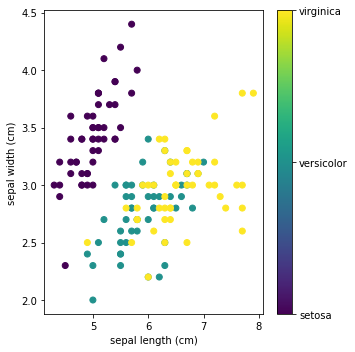

In [ ]:
#Data visualisation for the 3 classes of the iris flower
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

# Step 2: Data Manipulation and analysis : #

In [ ]:
#Checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
#Checking the description of the dataset
print(df.info())
print()
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%           

As you can see above there are no missing values. So we begin splitting the data into train and test. 

# Step 4 : Preparing the data for Machine Learning

## Data Standardisation : 

In [ ]:
# Scale the data to be between -1 and 1 before splitting 

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"] #Needed features in plot
scaled_features = scaling.fit_transform(df[features]) #Scaling 
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) #creating new matrix with scalling
df_feat.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
target_feature = df["species"].astype('category')
target_feature.dtypes
target_feature = target_feature.cat.codes


# Step 3: Divide dataset into Train/ Test : #


In [ ]:
#Splitting the dataset into train and test set

from sklearn.model_selection import train_test_split

X = df_feat
y = target_feature

#X_train, X_test, y_train, y_test = train_test_split(
                       # df, y, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.3) 


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(105, 4)
(105,)
(45, 4)
(45,)


# Step 5: SVM

In [ ]:
from sklearn.svm import SVC # for Support vector machine algo
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn import metrics # for checking model accuracy

In [ ]:
#SVM
#Before hyperparameter
svmmodel = SVC(kernel = 'linear', C = 10)
svmmodel.fit(X_train,y_train)
prediction = svmmodel.predict(test_X)
print("accuracy -> ", metrics.accuracy_score(prediction, test_y))

accuracy ->  0.9777777777777777


In [ ]:
#RBF kernel functions
svmmodel = SVC(kernel = 'rbf')
svmmodel.fit(train_X,train_y)
prediction = svmmodel.predict(test_X)
print("accuracy -> ", metrics.accuracy_score(prediction, test_y))

accuracy ->  1.0


In [ ]:
#After hyperparameter
C = [0.1,1,10,100]
gamma = [1, 0.1,0.01,0.001]
param_grid = {"C":C,"gamma":gamma,"kernel":["linear","rbf"]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(test_X,test_y);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


In [ ]:
print(grid.best_params_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
grid_prediction = grid.predict(test_X)#Hyperparameter prediction
print("accuracy for grid-> ", metrics.accuracy_score(grid_prediction,test_y))

accuracy for grid->  1.0


# Step 6: KNN

In [ ]:
#Training using nearest neighbor , starting with k=9

from sklearn import neighbors

k_range = list(range(1,31))
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

prediction = knn.predict(test_X)
print("accuracy for k = 9 is -> ", metrics.accuracy_score(prediction, test_y))

# What kind of iris has 5cm x 1cm sepal and 5cm x 4cm petal?
print(iris.target_names[knn.predict([[5, 1, 5, 4]])])


accuracy for k = 9 is ->  1.0
['virginica']


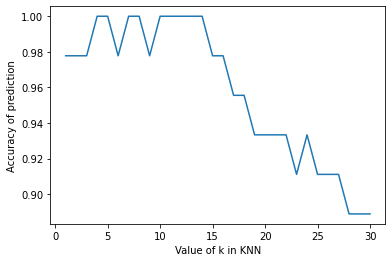

In [ ]:

k_scores = []
for k in k_range:
  knnmodel = KNeighborsClassifier(n_neighbors=k)
  knnmodel.fit(train_X,train_y)
  prediction = knnmodel.predict(test_X)
  k_scores.append(pd.Series(metrics.accuracy_score(prediction, test_y)))

plt.plot(k_range, k_scores)
plt.xlabel("Value of k in KNN")
plt.ylabel("Accuracy of prediction")
plt.show()

In [ ]:
options = ['uniform', 'distance']
param_dist = dict(n_neighbors = k_range, weights = options)
rand = RandomizedSearchCV(KNeighborsClassifier(), param_dist, cv= 4, scoring = "accuracy", n_iter = 10, random_state= 5)
rand.fit(train_X,train_y)
print("Best Score is -> ", rand.best_score_)
print("Best value of k is ->", rand.best_params_)

Best Score is ->  0.9334045584045585
Best value of k is -> {'weights': 'distance', 'n_neighbors': 10}
